In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('hr_data_clean.csv')

# PREGUNTAS

> 1. ¿Existe una diferencia significativa en las tasas de rotación y/o en el nivel de satisfacción laboral en función del género (hombre/mujer) o del estado civil del empleado?

### Satisfacción laboral por género

''

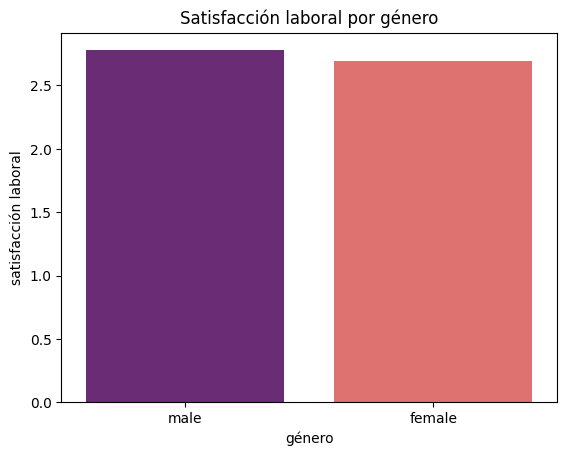

In [ ]:
#Comparación de variable género (eje x) con respecto a satisfacción laboral (eje y)
sns.barplot(data=df, x="gender", y="jobsatisfaction", hue="gender", errorbar=None, palette="magma")
plt.title("Satisfacción laboral por género")
plt.ylabel ("satisfacción laboral")
plt.xlabel ("género")
;

🔍 No observamos diferencias significativas en cuanto a satisfacción laboral por género.

### Satisfacción laboral por estado civil

C:\Users\elepf\AppData\Local\Temp\ipykernel_10196\3876685363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="maritalstatus", y="jobsatisfaction", errorbar=None, palette="magma")


''

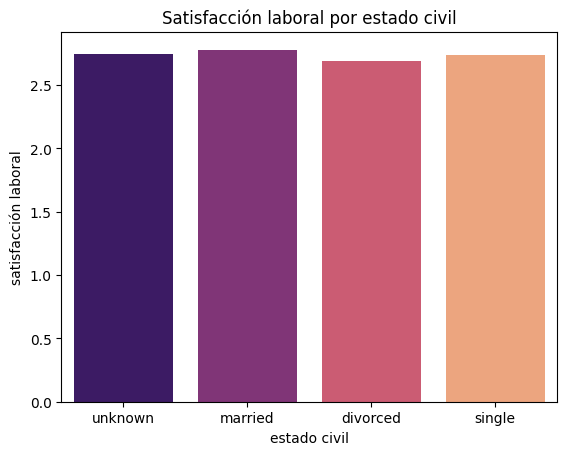

In [ ]:
#Satisfacción laboral por estado civil
sns.barplot(data=df, x="maritalstatus", y="jobsatisfaction", errorbar=None, palette="magma")
plt.title("Satisfacción laboral por estado civil")
plt.ylabel ("satisfacción laboral")
plt.xlabel ("estado civil")
;

🔍 No observamos diferencias significativas en cuanto a satisfacción laboral por estado civil

### Satisfacción laboral por género y estado civil

''

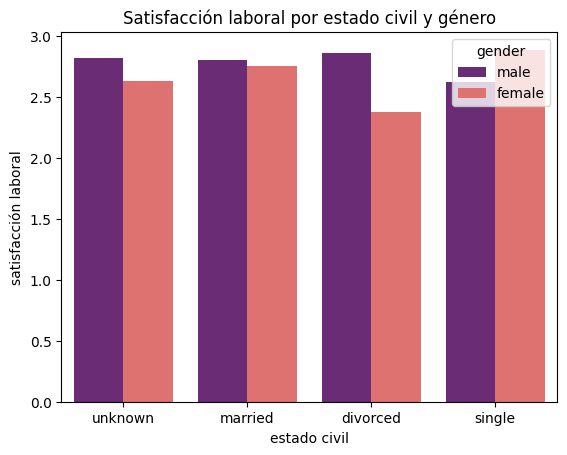

In [7]:
#Comparativa satisfacción por estado civil y género
sns.barplot(data=df, x="maritalstatus", y="jobsatisfaction", hue= "gender", errorbar=None, palette="magma")
plt.title("Satisfacción laboral por estado civil y género")
plt.ylabel ("satisfacción laboral")
plt.xlabel ("estado civil")
;

🔍 Encontramos diferencias en la satisfacción de hombres divorciados con respecto a las mujeres, estando ellos más satisfechos (puede deberse a tema conciliación, habría que estudiarlo más a fondo). También es notable, aunque menos, la diferencia de satisfacción entre mujeres solteras (más satisfechas) que hombres satisfechs.

### Índice de satisfacción general 

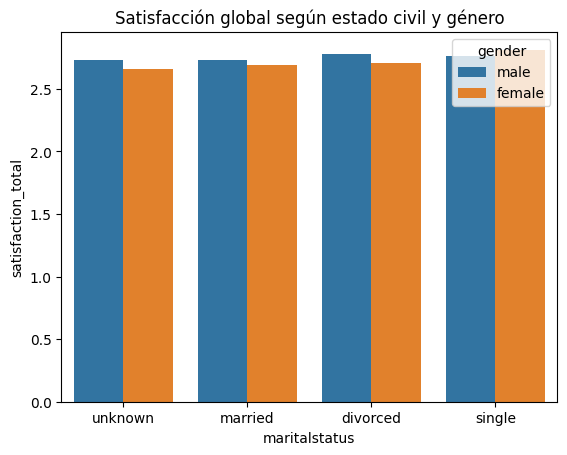

In [ ]:
#Agrupamos todas las columnas de satisfacción en una sola variable y sacamos la media:
cols_satisf = ["environmentsatisfaction", "relationshipsatisfaction", "worklifebalance", "jobsatisfaction"]
df["satisfaction_total"] = df[cols_satisf].mean(axis=1)

#Satisfacción total por estado civil y género
sns.barplot(data=df, x="maritalstatus", y="satisfaction_total", hue="gender", errorbar=None)
plt.title("Satisfacción global según estado civil y género")
plt.show()

🔍 No existen diferencias muy significativas.

> ¿Aumenta o disminuye la satisfacción laboral según los años en la compañía?

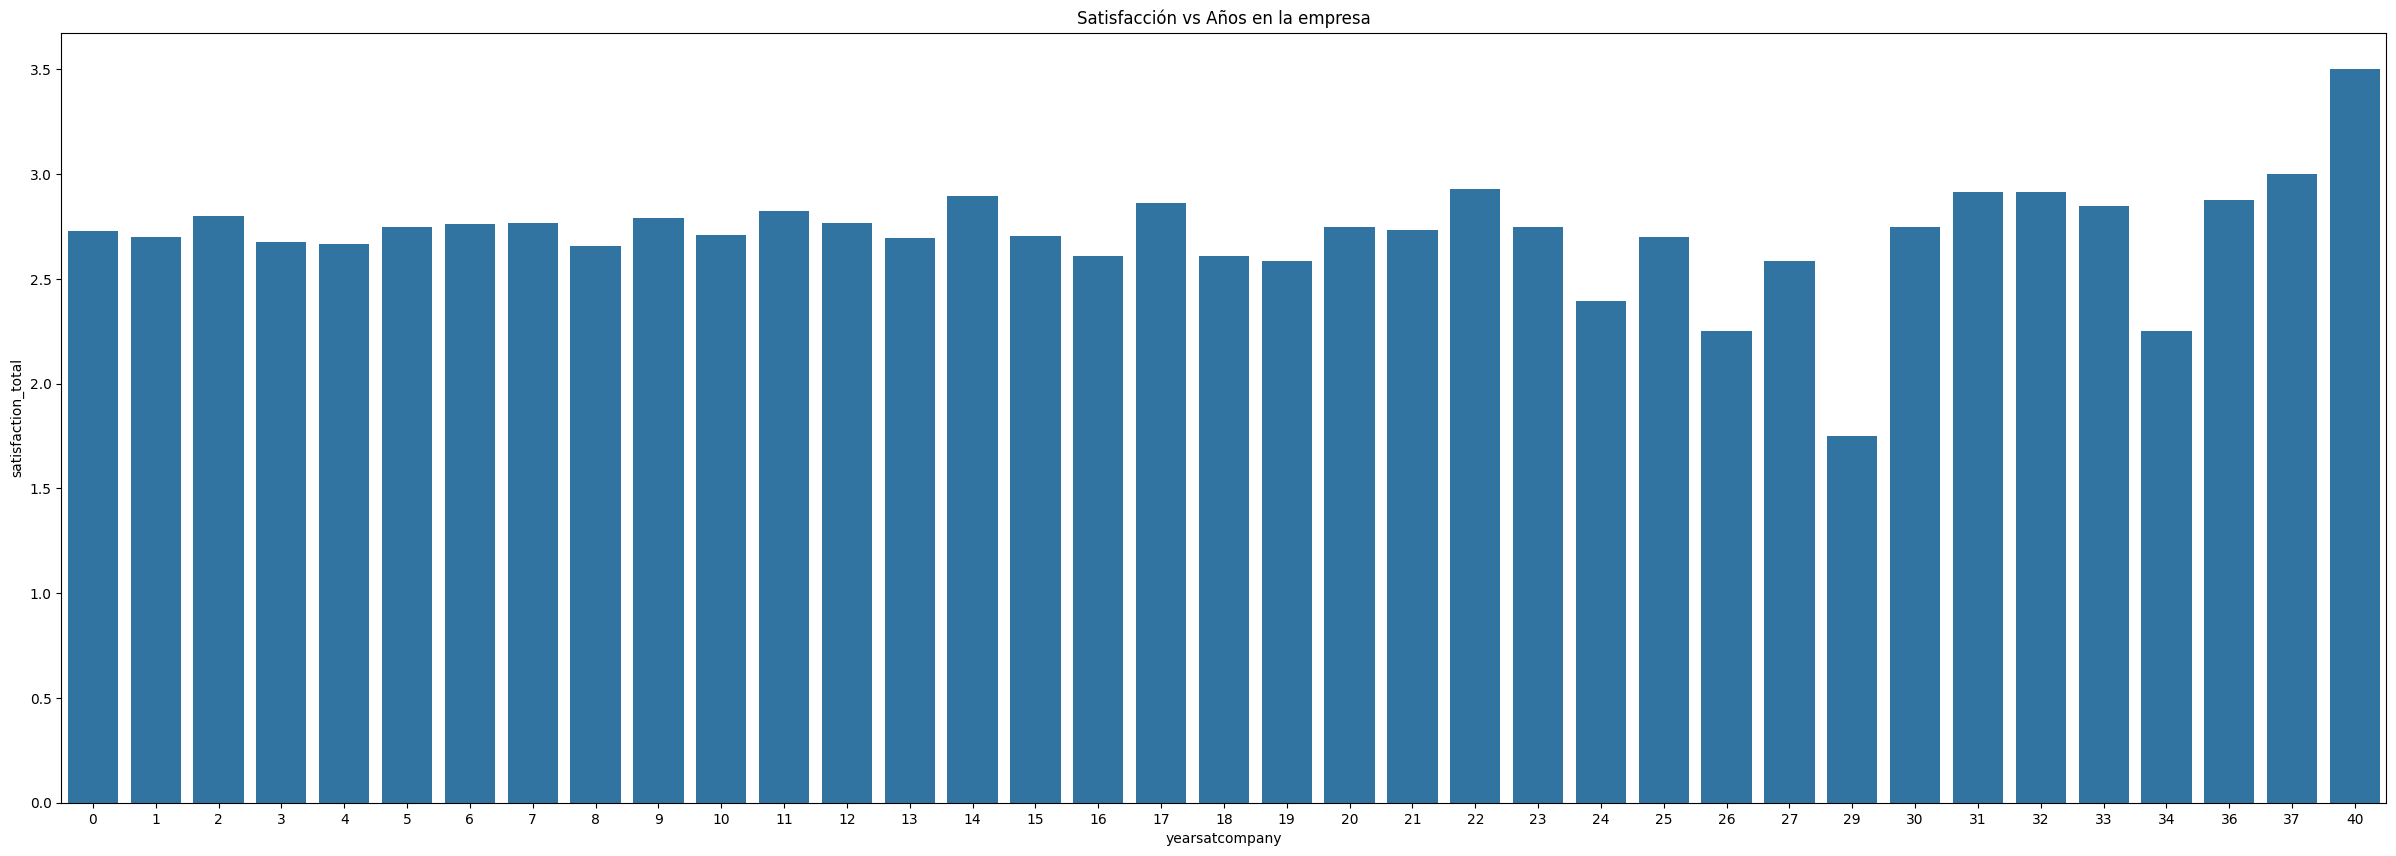

In [ ]:
#Barplot
plt.figure(figsize=(30,10))

sns.barplot(data=df, x="yearsatcompany", y="satisfaction_total", errorbar=None)
plt.title("Satisfacción vs Años en la empresa");

#mirar qué salario tienen los que están menos satisfechos. Comparativa con el resto. 
#los que llevan 40 años, probablemente son los fundadores. Más experiencia, más satisfacción. 3 años fijos y luego ampliaron la empresa.

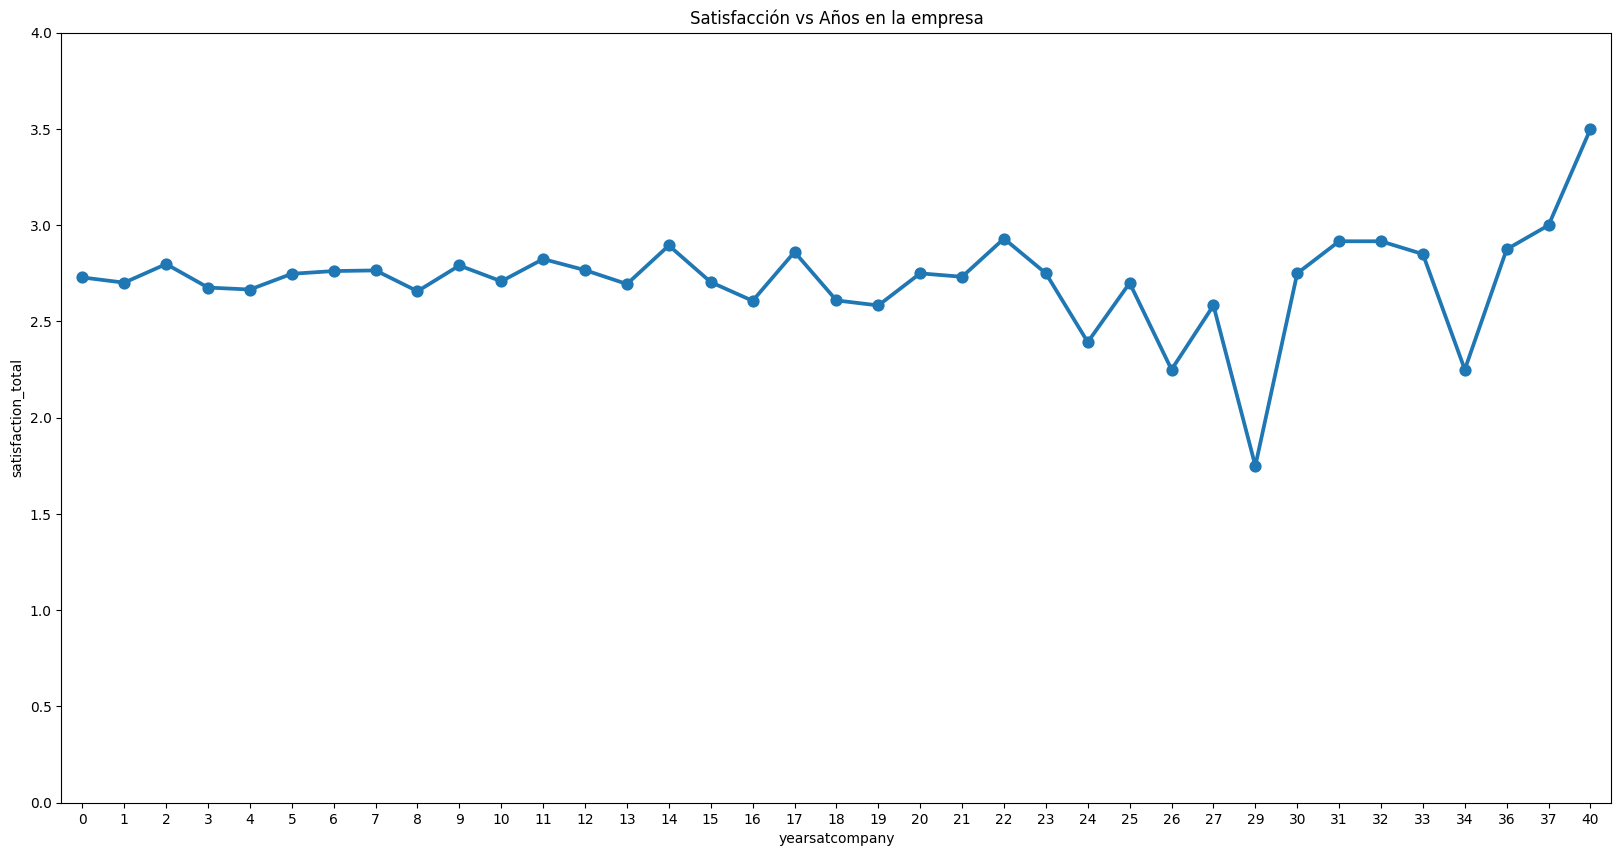

In [ ]:
#Pointplot
plt.figure(figsize=(20,10))

sns.pointplot(data=df, x="yearsatcompany", y="satisfaction_total", errorbar=None)
minimo_y = 0
maximo_y = 4
plt.ylim(minimo_y, maximo_y)
plt.title("Satisfacción vs Años en la empresa");


#USAR ESTE EN PRESENTACIÓN CON BASE 0 

> 2. ¿Cuál es la relación entre la edad media de los empleados y las tasas derotación de personal (correlación entre juventud y mayor rotación vs. edad avanzada y estabilidad)?

In [20]:
# 1. Definir los límites de los bins (de 18 años hasta el máximo, en pasos de 5)
bins = range(18, df["age"].max() + 5, 5)

# 2. Crear las etiquetas de los rangos (ej. '18-22', '23-27')
labels = [f"{b}-{b+4}" for b in bins[:-1]]

# 3. Aplicar el corte para crear la nueva columna 'age_bin'
df["age_bin"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

In [25]:
# Crear una nueva columna binaria 'attrition_flag'

df['attrition_flag'] = df['attrition'].apply(lambda x: 1 if x == 'yes' else 0)

# El Por Qué: Esto asigna 1 solo cuando el valor es 'yes', y 0 para 'no'.

In [26]:
# 1. Agrupar por el rango de edad ('age_bin')
# 2. Calcular la media ('mean') de la bandera binaria ('attrition_flag')
# La media de una variable 0/1 es la proporción o TASA.
df_rate = df.groupby("age_bin")["attrition_flag"].agg(tasa_rotacion="mean").reset_index()

# Mostrar el resultado (los rangos de edad con sus respectivas tasas de rotación)
print("--- Tasa de Rotación por Rango de Edad ---")
print(df_rate)

--- Tasa de Rotación por Rango de Edad ---
  age_bin  tasa_rotacion
0   18-22       0.476190
1   23-27       0.217143
2   28-32       0.214485
3   33-37       0.134409
4   38-42       0.085821
5   43-47       0.107692
6   48-52       0.130081
7   53-57       0.100000
8   58-62       0.242424


C:\Users\elepf\AppData\Local\Temp\ipykernel_10196\3440515766.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rate = df.groupby("age_bin")["attrition_flag"].agg(tasa_rotacion="mean").reset_index()


C:\Users\elepf\AppData\Local\Temp\ipykernel_10196\977169152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_rate, x="age_bin", y="tasa_rotacion", palette="viridis")


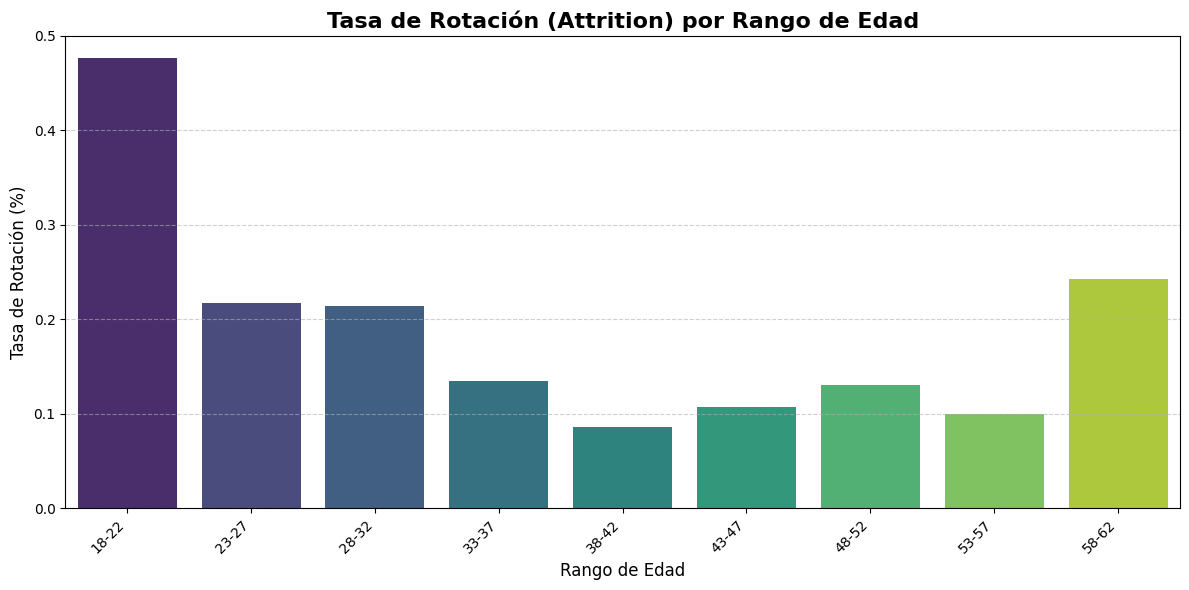

In [27]:
plt.figure(figsize=(12, 6))

# Usamos 'age_bin' en el eje X y 'tasa_rotacion' en el eje Y
sns.barplot(data=df_rate, x="age_bin", y="tasa_rotacion", palette="viridis")

# Mejorando la estética para una presentación profesional
plt.title("Tasa de Rotación (Attrition) por Rango de Edad", fontsize=16, weight='bold')
plt.xlabel("Rango de Edad", fontsize=12)

# Convertimos la etiqueta del Eje Y a porcentaje para que sea más intuitivo para el negocio
plt.ylabel("Tasa de Rotación (%)", fontsize=12)

# Opcional: Si quieres forzar que el eje Y se muestre como porcentaje:
# max_rate = df_rate['tasa_rotacion'].max() * 1.1 # Buscar el valor máximo para el límite del eje Y
# ticks = np.linspace(0, max_rate, 6) # Crear 6 ticks
# plt.yticks(ticks, [f'{i*100:.1f}%' for i in ticks]) 

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

> Otros datos interesantes

**Moda de edades**

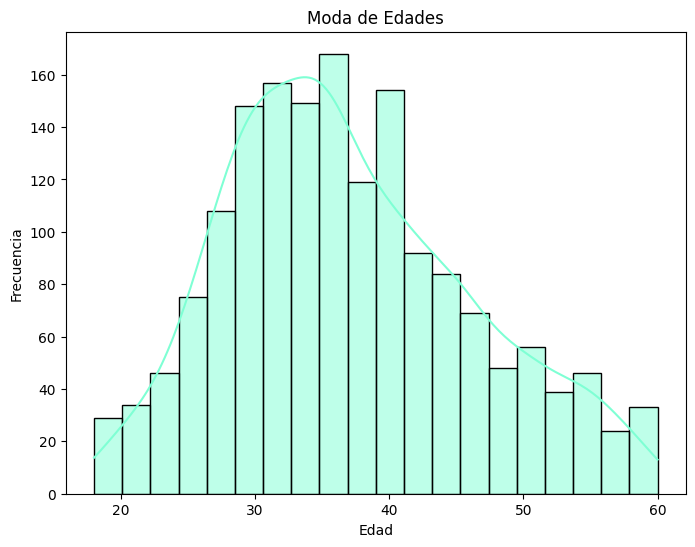

In [28]:
# establecemos el tamaño de la gráfica
plt.figure(figsize=(8, 6))

# creamos la gráfica usando el método 'histplot()'
sns.histplot(data=df,
             x='age',
             kde=True, 
             color='aquamarine')

# cambiamos el nombre del eje x
plt.xlabel('Edad')

# cambiamos el nombre del eje y
plt.ylabel('Frecuencia')

# ponemos título a la gráfica
plt.title('Moda de Edades');

**Moda de formación académica**

C:\Users\elepf\AppData\Local\Temp\ipykernel_10196\1448268636.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='educationfield',


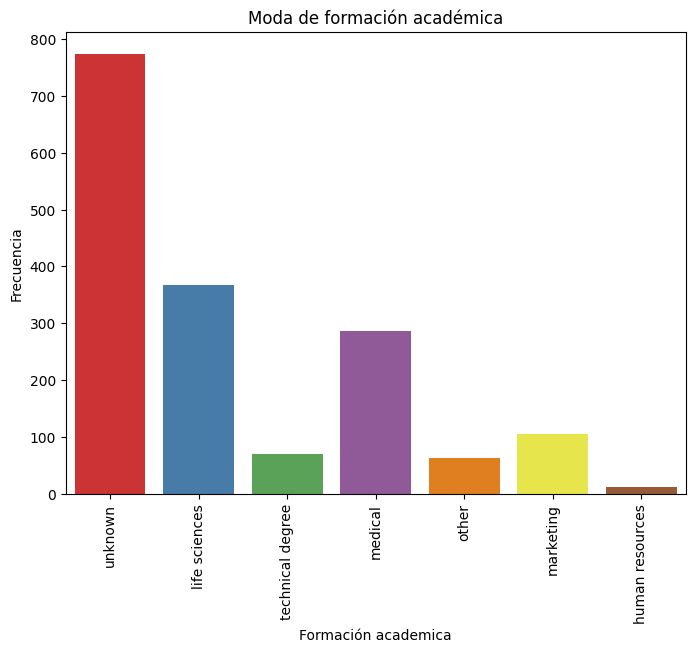

In [29]:
# Este gráfico de barras mostrará la frecuencia de cada nivel educativo y resaltará cuál es el más común (la moda).


# establecemos el tamaño de la gráfica
plt.figure(figsize=(8, 6))

# usamos el método `countplot()` para contar cuántos datos por categoría
sns.countplot(x='educationfield', 
              data=df, 
              palette='Set1')

# cambiamos el nombre del eje x
plt.xlabel('Formación academica')

# cambiamos el nombre del eje y
plt.ylabel('Frecuencia')

# ponemos título a la gráfica
plt.title('Moda de formación académica')

# rotamos las etiquetas del eje x si es necesario
plt.xticks(rotation=90); 